<a href="https://colab.research.google.com/github/nehaa56789/Quantum-kmeans-clustering/blob/main/classical_k_means_da3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Expanded dataset version

# ============================================
# Classical K-Means Crop Recommendation
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.utils import resample

In [15]:
# Step 1: Load Dataset
url = "/content/Crop_recommendation.csv"
df = pd.read_csv(url)

In [16]:
# Enlarge dataset by bootstrap resampling with two seeds for diversity
synthetic_size = 8000
X_synthetic = np.vstack([
    resample(X_normalized, n_samples=synthetic_size//2, random_state=42),
    resample(X_normalized, n_samples=synthetic_size//2, random_state=24)
])
print("Expanded dataset size:", X_synthetic.shape[0])

# Create a DataFrame
df_expanded = pd.DataFrame(X_synthetic, columns=features)

# Save to a CSV file
df_expanded.to_csv('expanded_dataset.csv', index=False)

Expanded dataset size: 8000


In [17]:
url = "/content/expanded_dataset.csv"
df = pd.read_csv(url)

In [18]:
# Step 2: Feature Selection
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features].values

In [19]:
# Step 3: Handle Missing Values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [20]:
# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
# Step 5: L2 Normalization
X_normalized = normalize(X_scaled, norm='l2')

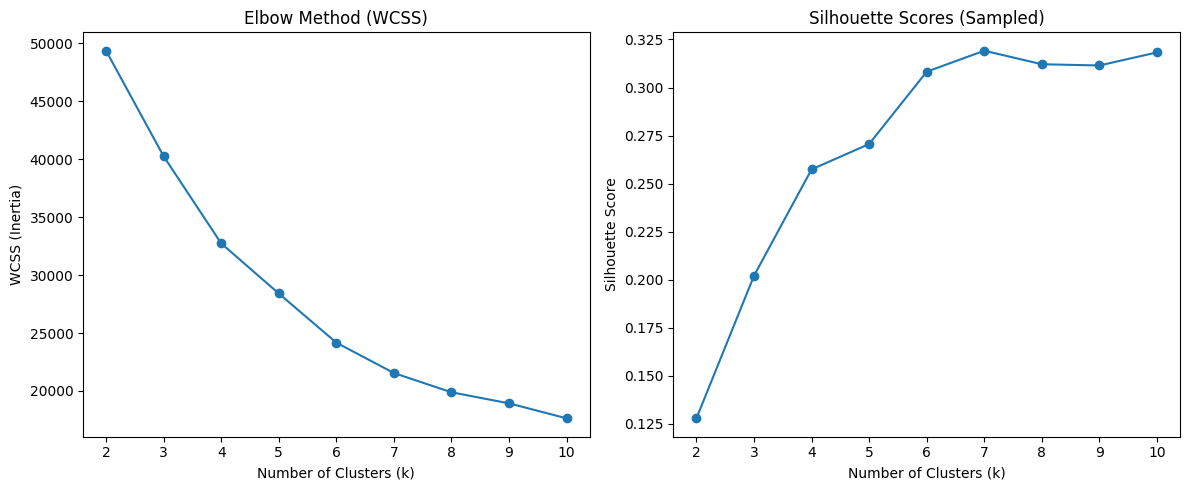

Best k based on silhouette score: 7


In [22]:

# --- Scale the features (important for K-Means) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Prepare sampling for silhouette score ---
X_sampled = resample(X_scaled, n_samples=500, random_state=42)

# --- Elbow and Silhouette calculations ---
k_values = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_full = kmeans.fit_predict(X_scaled)

    # Elbow method uses full data
    wcss.append(kmeans.inertia_)

    # Silhouette score uses sampled data
    labels_sampled = kmeans.predict(X_sampled)
    silhouette_scores.append(silhouette_score(X_sampled, labels_sampled))

# --- Plot results ---
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores (Sampled)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

print(f"Best k based on silhouette score: {k_values[np.argmax(silhouette_scores)]}")

In [23]:
# Step 6: Classical K-Means Clustering
k = 7  # choose number of clusters (can be tuned)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_normalized)

In [24]:
# Step 7: Add cluster labels back to the dataframe
df['Cluster'] = clusters

In [25]:
# Step 8: Evaluate clustering quality
sil_score = silhouette_score(X_normalized, clusters)
print(f"✅ Silhouette Score (Classical): {sil_score:.4f}")

✅ Silhouette Score (Classical): 0.3317


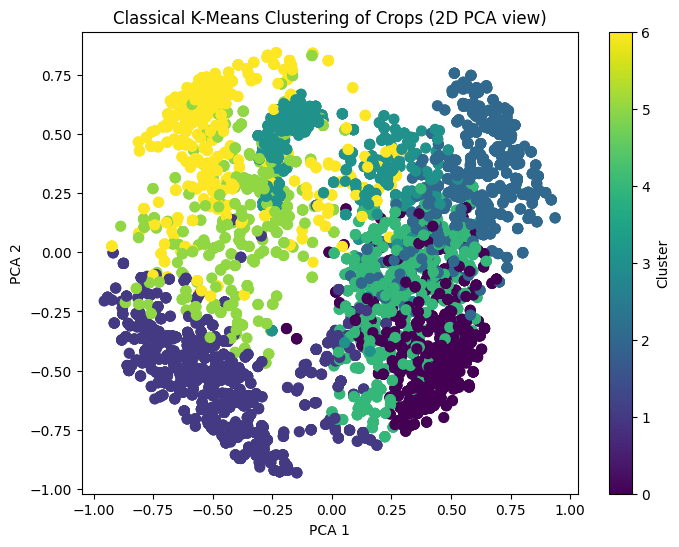

In [26]:
# Step 9: Visualize clusters (2D PCA projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.title("Classical K-Means Clustering of Crops (2D PCA view)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [28]:
# Step 10: Example cluster preview
print("\n📊 Sample Clustered Data:")
print(df[['N','P','K','temperature','humidity','ph','rainfall','Cluster']].head(10))


📊 Sample Clustered Data:
          N         P         K  temperature  humidity        ph  rainfall  \
0 -0.307972  0.457740 -0.316409    -0.199142 -0.251215  0.425670 -0.558167   
1 -0.231041  0.461806  0.663592    -0.518986  0.083152 -0.030188 -0.125813   
2 -0.673134 -0.330716 -0.212738     0.285923 -0.556005  0.004846 -0.036641   
3  0.736287  0.582905 -0.010735     0.162853  0.277647 -0.050161 -0.108917   
4 -0.372406 -0.497073 -0.288833    -0.294802  0.302603  0.590662  0.058726   
5  0.630393 -0.296024 -0.168365     0.164027 -0.121103  0.232745  0.625209   
6 -0.240944  0.308267 -0.188641    -0.461026 -0.225241 -0.259509  0.693332   
7 -0.222644  0.529267  0.665319     0.348508  0.125098 -0.263442 -0.145424   
8 -0.313767  0.247395 -0.171428    -0.075201 -0.785675 -0.356606 -0.246680   
9  0.668422 -0.319314  0.042900     0.224890  0.350747 -0.152968 -0.502406   

   Cluster  
0        1  
1        3  
2        5  
3        3  
4        4  
5        2  
6        6  
7        3 

In [29]:


# Assuming:
# X_normalized = preprocessed dataset
# clusters = labels predicted by classical KMeans

sil_classical = silhouette_score(X_normalized, clusters)
db_classical = davies_bouldin_score(X_normalized, clusters)

print("📊 Classical Model Metrics")
print(f"✅ Silhouette Score: {sil_classical:.4f}")
print(f"✅ Davies–Bouldin Index: {db_classical:.4f}")


📊 Classical Model Metrics
✅ Silhouette Score: 0.3317
✅ Davies–Bouldin Index: 1.1890


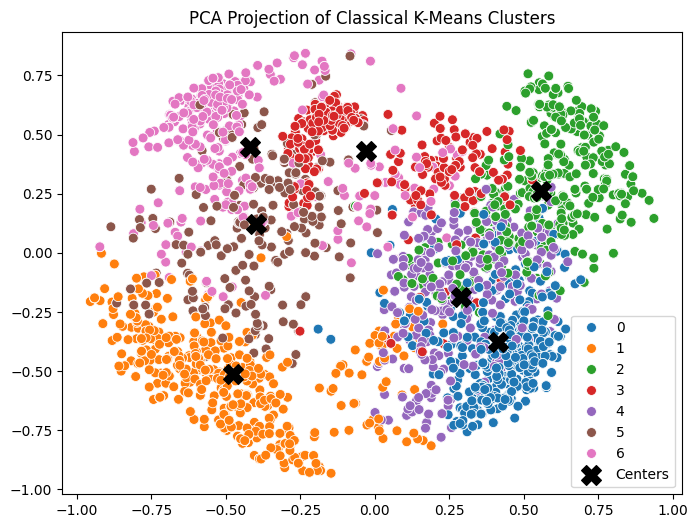

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='tab10', s=50)
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='black', s=200, marker='X', label='Centers')
plt.title("PCA Projection of Classical K-Means Clusters")
plt.legend()
plt.show()


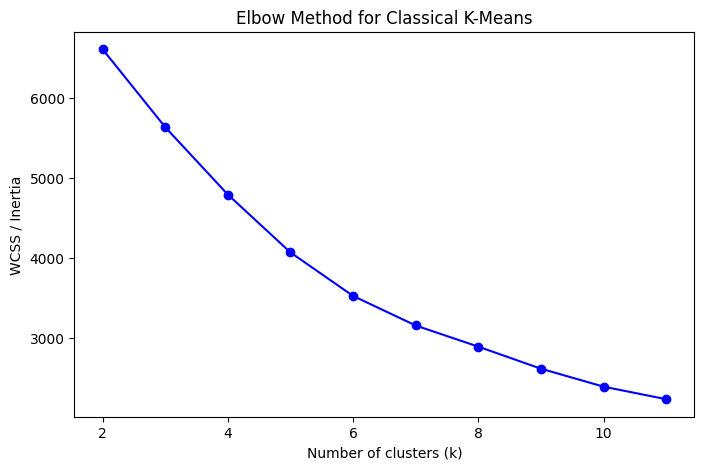

In [31]:
wcss = []
K_range = range(2, 12)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_normalized)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method for Classical K-Means')
plt.show()


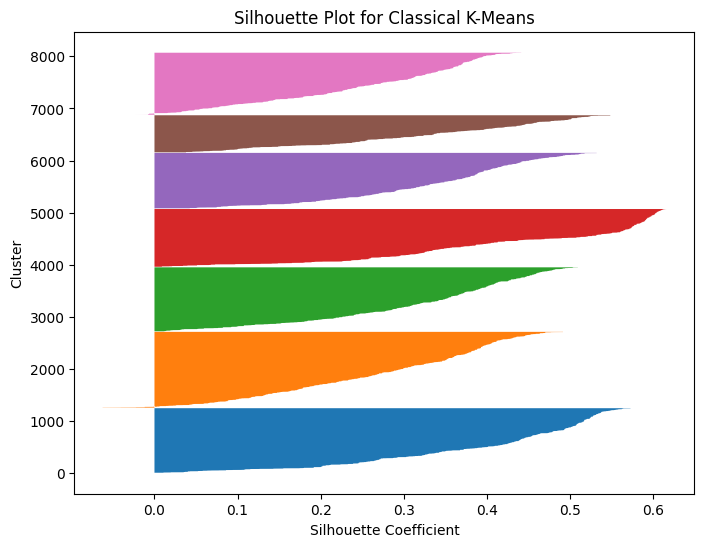

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

sil_samples = silhouette_samples(X_normalized, df['Cluster'])
y_lower = 10
plt.figure(figsize=(8,6))

for i in range(k):
    ith_cluster_silhouette = sil_samples[df['Cluster'] == i]
    ith_cluster_silhouette.sort()
    plt.fill_betweenx(np.arange(y_lower, y_lower + len(ith_cluster_silhouette)),
                      0, ith_cluster_silhouette)
    y_lower += len(ith_cluster_silhouette) + 10

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for Classical K-Means")
plt.show()


Davies-Bouldin Index: 1.1890
Calinski-Harabasz Index: 2042.1893


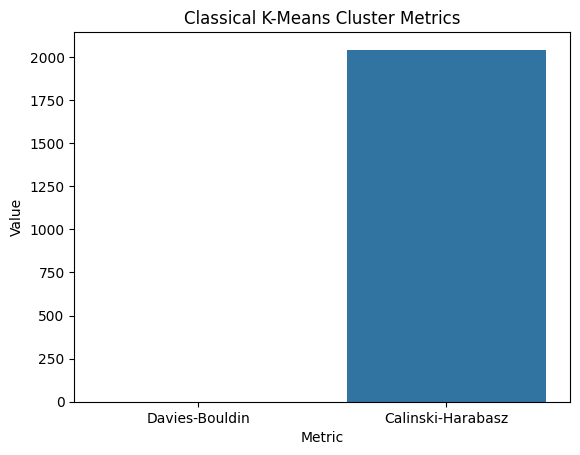

In [33]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

dbi = davies_bouldin_score(X_normalized, df['Cluster'])
chi = calinski_harabasz_score(X_normalized, df['Cluster'])
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {chi:.4f}")

# Optional bar chart
import pandas as pd
metrics_df = pd.DataFrame({'Metric': ['Davies-Bouldin', 'Calinski-Harabasz'],
                           'Value': [dbi, chi]})
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title('Classical K-Means Cluster Metrics')
plt.show()


/tmp/ipython-input-2324036763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')


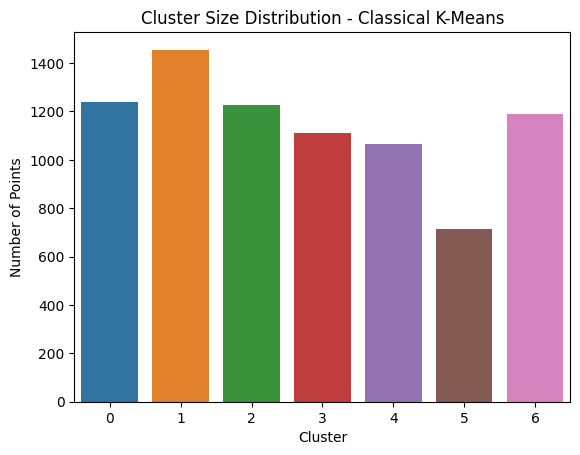

In [34]:
cluster_counts = df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution - Classical K-Means')
plt.show()
